In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.pandeia.pandeia_output import PandeiaOutput
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays')
pickle_dir = os.path.join(repo_path, 'output', 'pickles')

In [4]:
oversample_factor = 1

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

# plot.plot(filepath=None,
#           title='Test lens model (no noise or PSF)',
#           array=model,
#           colorbar=True)

In [6]:
calc = pandeia_input.build_pandeia_calc(csv=csv,
                                        array=model, 
                                        lens=physical_lens, 
                                        band='f106', 
                                        oversample_factor=oversample_factor)

100%|██████████| 45/45 [00:00<00:00, 9755.71it/s]


Converting (45, 45) array to point sources...


  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 45/45 [00:28<00:00,  1.57it/s]

Point source conversion complete: 2025 point sources


In [7]:
results, execution_time = pandeia_input.get_pandeia_results(calc)
print(f'Execution time: {execution_time}')

Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:03:28


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


In [9]:
with open(os.path.join(pickle_dir, f'results_{oversample_factor}'), 'ab') as results_file:
    pickle.dump(results, results_file)

In [5]:
with open(os.path.join(pickle_dir, f'results_{oversample_factor}'), 'rb') as results_file:
    results = pickle.load(results_file)

In [6]:
pandeia_output = PandeiaOutput(results)

In [7]:
for keys in pandeia_output.results.keys():
    print(keys)

sub_reports
input
1d
2d
3d
scalar
information
transform
warnings
web_report


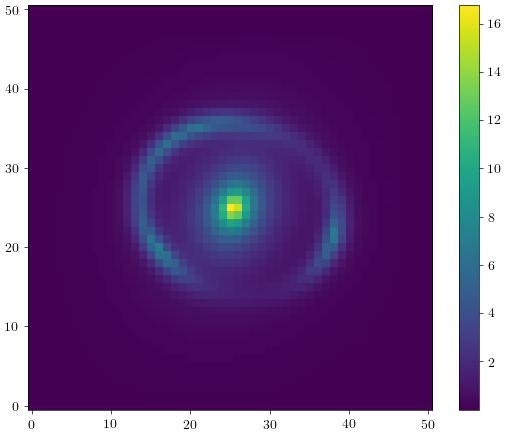

In [8]:
plt.imshow(pandeia_output.get_snr())
plt.colorbar()
plt.show()

(51, 51, 107)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (51,)  and requested shape (51,107)

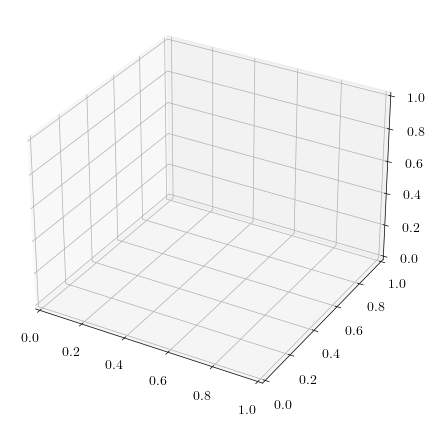

In [9]:
flux = results['3d']['flux']
print(flux[0].shape)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs=flux[0][0], ys=flux[0][1], zs=np.zeros(51))

plt.show()